In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# pd.reset_option("^display")
import warnings
warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/flight-price-prediction/business.csv
/kaggle/input/flight-price-prediction/economy.csv
/kaggle/input/flight-price-prediction/Clean_Dataset.csv


# Dataset
Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

# Features
The various features of the cleaned dataset are explained below:

* Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
* Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
* Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
* Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
* Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
* Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
* Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
* Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
* Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours. 10.Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
* Price: Target variable stores information of the ticket price.

In [2]:
cd = pd.read_csv('/kaggle/input/flight-price-prediction/Clean_Dataset.csv')
df = cd.copy()
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.shape

(300153, 12)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,300153.0,150076.000000,86646.852011,0.00,75038.00,150076.00,225114.00,300152.00
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [5]:
df['Unnamed: 0'].nunique()

300153

In [6]:
# it is the same as index
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
df.airline.value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [8]:
df.flight.value_counts()

UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64

In [9]:
df.stops.value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

In [10]:
df.arrival_time.value_counts()

Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64

In [11]:
df.destination_city.value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

In [12]:
df['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

In [13]:
df['duration'].value_counts()

2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
37.17       1
38.75       1
38.50       1
36.25       1
41.50       1
Name: duration, Length: 476, dtype: int64

In [14]:
df['days_left'].value_counts()

25    6633
18    6602
39    6593
32    6585
26    6573
24    6542
19    6537
31    6534
33    6532
40    6531
41    6525
28    6522
38    6512
20    6502
30    6501
42    6497
22    6494
36    6490
21    6479
37    6476
43    6472
44    6436
17    6419
11    6417
34    6412
13    6404
23    6401
29    6397
12    6381
27    6360
14    6349
15    6340
45    6314
35    6291
16    6272
46    6160
49    6154
48    6078
47    6069
10    5822
8     5767
6     5740
7     5703
9     5665
5     5392
4     5077
3     4248
2     4026
1     1927
Name: days_left, dtype: int64

In [15]:
df['price'].value_counts()

54608    1445
2339     1442
54684    1390
60978    1383
60508    1230
         ... 
12014       1
26912       1
20145       1
25462       1
7533        1
Name: price, Length: 12157, dtype: int64

In [16]:
# no nulls
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [17]:
df.isnull().values.any()

False

In [18]:
# correlation between numberic columns
df.corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


[Text(0.5, 0, 'airline'), Text(0, 0.5, 'Frequency of airline')]

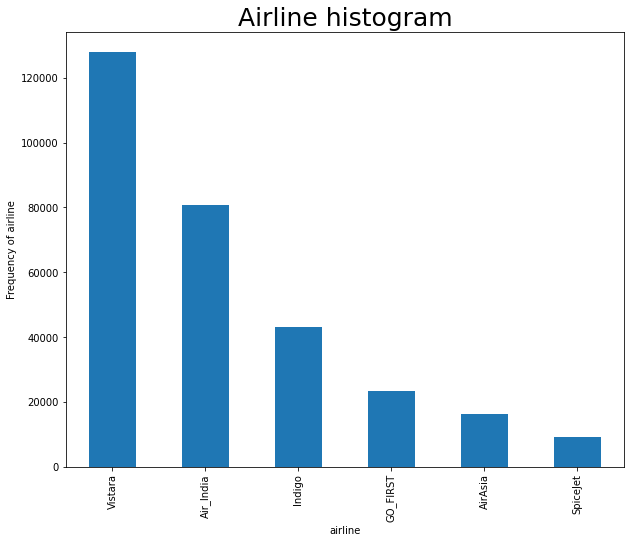

In [20]:
# airline companies and flight numbers
plt.figure(figsize=(10, 8))
plt1 = df.airline.value_counts().plot(kind='bar')
plt.title('Airline histogram', fontsize=25)
plt1.set(xlabel = 'airline', ylabel='Frequency of airline')

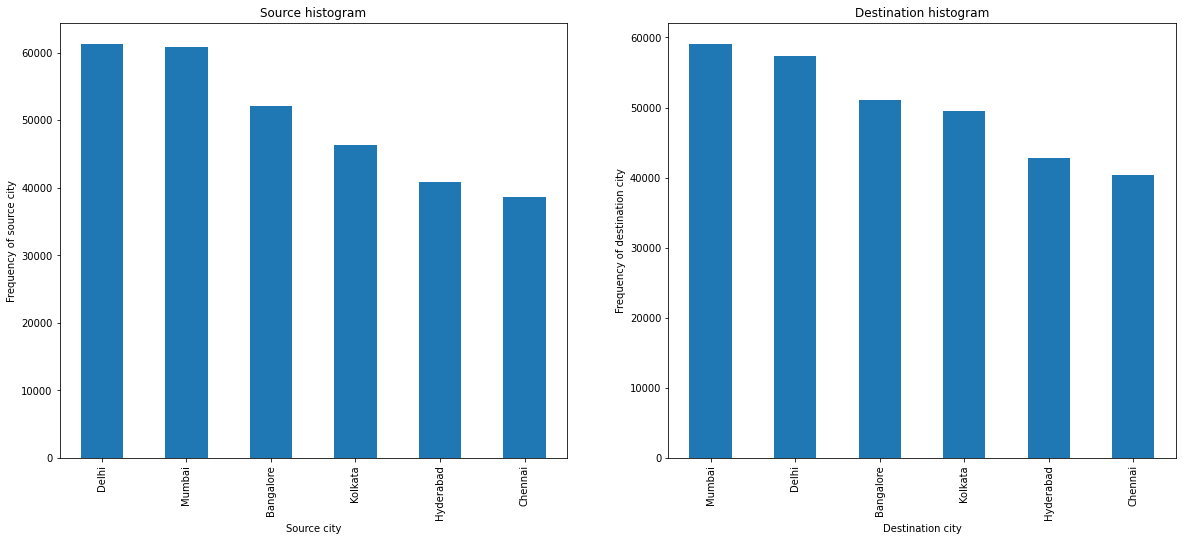

In [21]:
# flight numbers acording to source city
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Source histogram')
plt1 = df['source_city'].value_counts().plot(kind='bar')
plt1.set(xlabel = 'Source city', ylabel='Frequency of source city')

# flight numbers acording to destination city
plt.subplot(1,2,2)
plt.title('Destination histogram')
plt1 = df['destination_city'].value_counts().plot(kind='bar')
plt1.set(xlabel = 'Destination city', ylabel='Frequency of destination city')
plt.show()

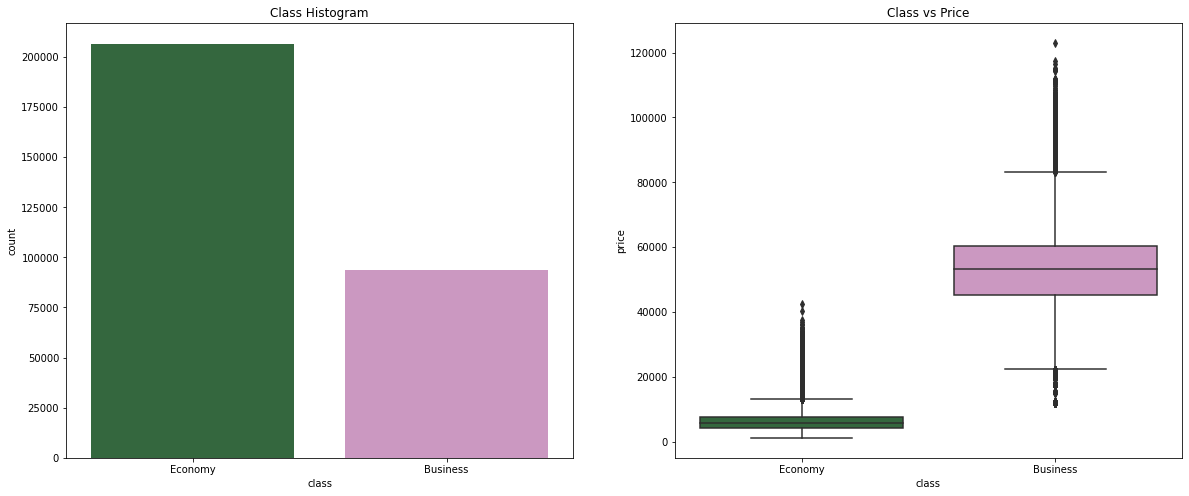

In [22]:
plt.figure(figsize=(20,8))

# economy vs business
plt.subplot(1,2,1)
plt.title('Class Histogram')
sns.countplot(df['class'], palette=("cubehelix"))

# class vs price
plt.subplot(1,2,2)
plt.title('Class vs Price')
sns.boxplot(x=df['class'], y=df.price, palette=("cubehelix"))

plt.show()

In [23]:
# airlines companies and average ticket prices
df.groupby('airline')['price'].mean().sort_values(ascending=False)

airline
Vistara      30396.536302
Air_India    23507.019112
SpiceJet      6179.278881
GO_FIRST      5652.007595
Indigo        5324.216303
AirAsia       4091.072742
Name: price, dtype: float64

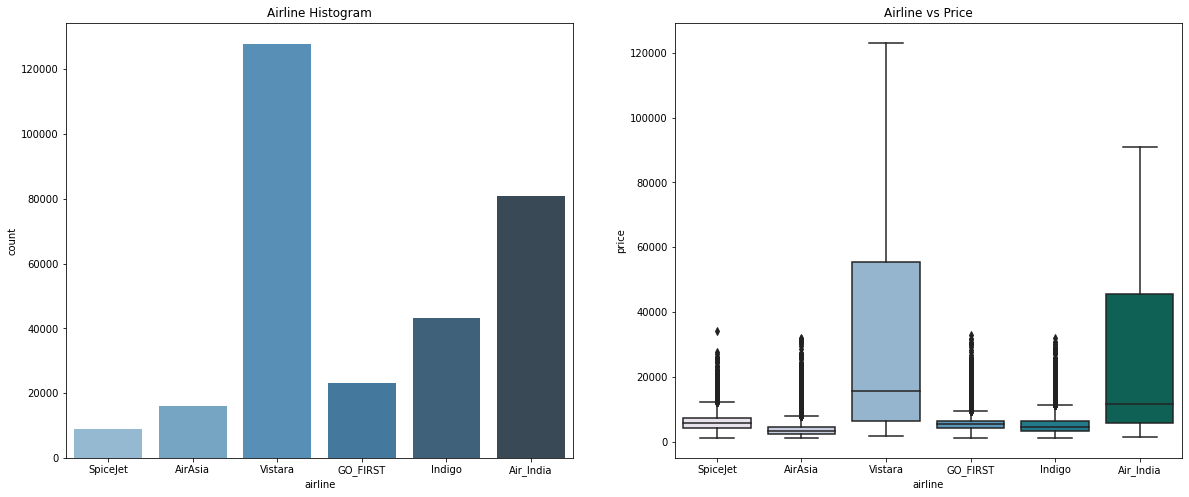

In [24]:
plt.figure(figsize=(20,8))

# airline companies and flight numbers
plt.subplot(1,2,1)
plt.title('Airline Histogram')
sns.countplot(df.airline, palette=("Blues_d"))

# airline companies and prices
plt.subplot(1,2,2)
plt.title('Airline vs Price')
sns.boxplot(x=df.airline, y=df.price, palette=("PuBuGn"))

plt.show()

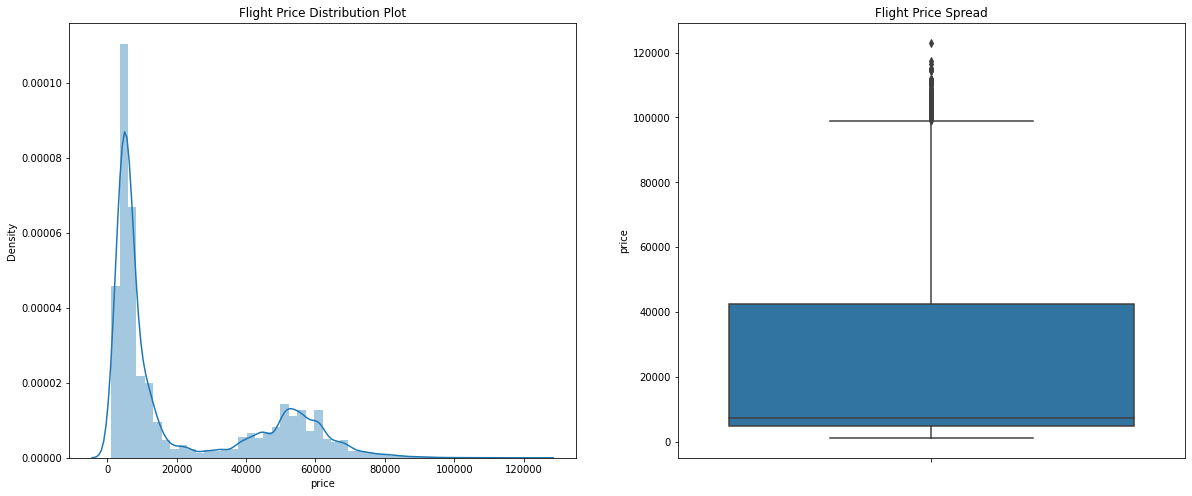

In [25]:
plt.figure(figsize=(20,8))

# price density
plt.subplot(1,2,1)
plt.title('Flight Price Distribution Plot')
sns.distplot(df.price)

# price spread
plt.subplot(1,2,2)
plt.title('Flight Price Spread')
sns.boxplot(y=df.price)

plt.show()

In [26]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


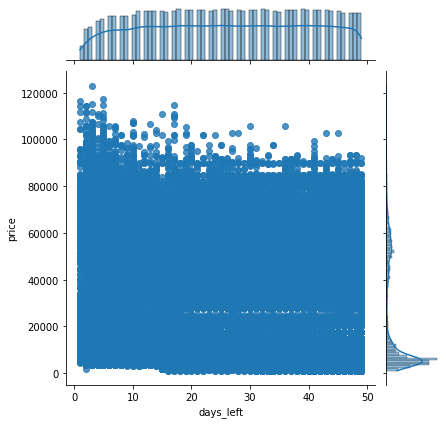

In [27]:
# days left vs price
sns.jointplot(x = "days_left", y = "price", data = df, kind = "reg")
# sns.jointplot(x = "days_left", y = "price", data = df.iloc[:500], kind = "reg") # get a readable graph

# Simple Linear Regression

### Model

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
# model training
X = df[["days_left"]]
y = df["price"]
reg = LinearRegression()
model = reg.fit(X, y)

In [30]:
X

,days_left
0,1
1,1
2,1
3,1
4,1
...,...
300148,49
300149,49
300150,49
300151,49


In [31]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [32]:
# when x=0 y's value
model.intercept_

24891.76853390277

In [33]:
# coefficients of x
model.coef_

array([-153.89910961])

In [34]:
model.score(X,y)

0.008454532568481943

In [35]:
# days left 20 prices mean and prediction
c_t = pd.DataFrame({"gercek_y": df.loc[df["days_left"] == 20].mean()[2],
                   "tahmin_y": reg.predict([[20]])})
c_t

,gercek_y,tahmin_y
0,19699.98339,21813.786342


In [36]:
# real values and predicted values for first five
k_t = pd.DataFrame({"gercek_y": y[0:5],
                   "tahmin_y": reg.predict(X)[0:5]})
k_t

,gercek_y,tahmin_y
0,5953,24737.869424
1,5953,24737.869424
2,5956,24737.869424
3,5955,24737.869424
4,5955,24737.869424


### Hata Tespiti

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
k_t['hata'] = k_t['gercek_y'] - k_t['tahmin_y']
k_t

,gercek_y,tahmin_y,hata
0,5953,24737.869424,-18784.869424
1,5953,24737.869424,-18784.869424
2,5956,24737.869424,-18781.869424
3,5955,24737.869424,-18782.869424
4,5955,24737.869424,-18782.869424


In [39]:
# new column for square of error
k_t['hata_kare'] = k_t['hata']**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,5953,24737.869424,-18784.869424,3.528713e+08
1,5953,24737.869424,-18784.869424,3.528713e+08
2,5956,24737.869424,-18781.869424,3.527586e+08
3,5955,24737.869424,-18782.869424,3.527962e+08
4,5955,24737.869424,-18782.869424,3.527962e+08


In [40]:
np.sum(k_t['hata_kare'])

1764093625.2664616

In [41]:
np.mean(k_t['hata_kare'])

352818725.05329233

In [42]:
np.sqrt(np.mean(k_t['hata_kare']))

18783.46946262304

# Multiple Linear Regression

In [43]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [44]:
# df.flight.value_counts(dropna=False).to_frame()
# df.airline.value_counts(dropna=False).to_frame()
# df.source_city.value_counts(dropna=False).to_frame()
# df.departure_time.value_counts(dropna=False).to_frame()
# df.stops.value_counts(dropna=False).to_frame()
# df.destination_city.value_counts(dropna=False).to_frame()

In [45]:
# flight column dropped because of it not avaible for one hot encoding,
# arrival_time and destination_city column are same as departure_time and source_city
df = df.drop(['flight','arrival_time', 'destination_city'], axis=1)
df.head()

,airline,source_city,departure_time,stops,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Economy,2.33,1,5955


In [46]:
# one hot encoding object columns
dms = pd.get_dummies(df[['airline', 'source_city','departure_time','stops','class']])
dms.head()

,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,...,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_one,stops_two_or_more,stops_zero,class_Business,class_Economy
0,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
1,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
2,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1


In [47]:
X_ = df.drop(['airline', 'source_city','departure_time','stops','class'], axis=1)

In [48]:
X = pd.concat([X_, dms], axis = 1)
df1 = X.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      300153 non-null  float64
 1   days_left                     300153 non-null  int64  
 2   price                         300153 non-null  int64  
 3   airline_AirAsia               300153 non-null  uint8  
 4   airline_Air_India             300153 non-null  uint8  
 5   airline_GO_FIRST              300153 non-null  uint8  
 6   airline_Indigo                300153 non-null  uint8  
 7   airline_SpiceJet              300153 non-null  uint8  
 8   airline_Vistara               300153 non-null  uint8  
 9   source_city_Bangalore         300153 non-null  uint8  
 10  source_city_Chennai           300153 non-null  uint8  
 11  source_city_Delhi             300153 non-null  uint8  
 12  source_city_Hyderabad         300153 non-nul

In [49]:
df1 = df1.drop("class_Business", axis=1)

X = df1.drop("price", axis = 1)

y = df1["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

training = df1.copy()

print("training", training.shape)

X_train (240122, 24)
y_train (240122,)
X_test (60031, 24)
y_test (60031,)
training (300153, 25)


In [50]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
model.intercept_

53293.816241769746

In [51]:
model.coef_

array([ 4.55927498e+01, -1.31055902e+02, -1.81809700e+03, -1.66306066e+03,
       -9.39823004e+01,  4.90405278e+02,  7.40536451e+02,  2.34419823e+03,
        1.56064623e+02,  1.71250429e+02, -8.60116993e+02, -1.09207100e+03,
        1.56052083e+03,  6.43521114e+01, -5.81420098e+02,  6.42894586e+01,
        3.58112583e+01,  4.85518331e+02,  1.70444601e+02, -1.74643551e+02,
        1.79444136e+03,  4.26222918e+03, -6.05667054e+03, -4.49869366e+04])

## Prediction

In [52]:
new_data = [[2.41], [22],[1],[0], [0],[0],[0],[0], [1],[0],[0], [0],[0],[0], [1],[0],[0], [0],[0],[0], [1],[0],[0], [1]]
new_data = pd.DataFrame(new_data).T
new_data.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,2.41,22.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [53]:
model.predict(new_data)

array([5084.51721574])

In [54]:
# train data
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
rmse

6845.13245156569

In [55]:
# test data
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
rmse

6859.877949346091

# Model Tuning

In [56]:
model.score(X_train, y_train)

0.9090377632547896

In [57]:
# train data
np.sqrt(-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

6845.596754035166

In [58]:
# test data
np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

6860.827286208287

# PCR

## Model

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df1.copy()

print("training", training.shape)

X_train (225114, 24)
y_train (225114,)
X_test (75039, 24)
y_test (75039,)
training (300153, 25)


In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()

In [61]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_train.shape

(225114, 24)

In [62]:
X_reduced_train[0:1,:]

array([[-2.23435003e+00,  1.88294722e+00, -5.14811011e-01,
         9.57914990e-01,  8.94391582e-01,  6.41168313e-01,
        -1.32895420e+00, -5.01750557e-01, -4.31106581e-01,
         1.31177042e+00,  9.80502518e-01,  9.51588725e-01,
        -3.38746783e-01,  6.42383959e-01, -6.40966397e-01,
         6.93725040e-01, -6.02154738e-01,  1.18663286e+00,
         2.57752761e-01,  1.59324420e+00,  5.79124065e-14,
         7.25018663e-15, -2.39174205e-14, -6.39650087e-15]])

In [63]:
X_reduced_train[:,0]

array([-2.23435003, -1.69368459, -1.22479576, ..., -0.90937662,
        0.56470031, -0.9541461 ])

In [64]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]

array([10.63, 17.53, 23.91, 29.69, 35.37])

In [65]:
# np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:10]

In [66]:
lm = LinearRegression()

In [67]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [68]:
pcr_model.intercept_

20883.254107928657

In [69]:
pcr_model.coef_

array([-6.82916006e+03,  7.03874823e+03,  3.54280523e+03,  1.14402296e+03,
       -2.00265193e+03, -3.12148719e+03, -2.93052801e+03, -2.33499070e+03,
       -9.67219698e+02, -5.04283919e+02,  9.70322444e+02, -5.02016490e+03,
        4.97482597e+03,  8.37208277e+01, -4.71858555e+01, -4.64825457e+02,
       -1.49305621e+03,  3.91007194e+03,  1.51141993e+04,  2.95026040e+03,
       -1.92655813e+16,  6.64713983e+14, -2.77475394e+14,  3.54344499e+13])

## Prediction

In [70]:
y_pred = pcr_model.predict(X_reduced_train)

In [71]:
y_pred[0:5]

array([56977.84276228, 48913.2364397 ,  6462.18236538, 59216.1356578 ,
       51533.68605099])

In [72]:
np.sqrt(mean_squared_error(y_train, y_pred))

6847.358492535665

In [73]:
df1["price"].mean()

20889.660523133203

In [74]:
pca2 = PCA()
X_reduced_test = pca2.fit_transform(scale(X_test))
y_pred = pcr_model.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, y_pred))

9008.773521833915

## Model Tuning

In [75]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

16786.507756999676


In [76]:
from sklearn import model_selection

In [77]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [78]:
lm = LinearRegression()

In [79]:
RMSE = []

In [80]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

In [81]:
import matplotlib.pyplot as plt

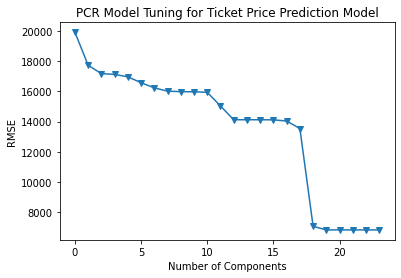

In [82]:
plt.plot(RMSE, '-v')
plt.xlabel('Number of Components')
plt.ylabel('RMSE')
plt.title('PCR Model Tuning for Ticket Price Prediction Model');

In [83]:
lm = LinearRegression()

In [84]:
pcr_model = lm.fit(X_reduced_train[:,0:20], y_train)
y_pred = pcr_model.predict(X_reduced_train[:,0:20])
print(np.sqrt(mean_squared_error(y_train, y_pred)))

6847.3624636545055


In [85]:
y_pred = pcr_model.predict(X_reduced_test[:,0:20])

In [86]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

9008.824966205219


# PLS

## Model

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df1.copy()

print("training", training.shape)

X_train (225114, 24)
y_train (225114,)
X_test (75039, 24)
y_test (75039,)
training (300153, 25)


In [88]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [89]:
pls_model = PLSRegression().fit(X_train, y_train)
pls_model.coef_

array([[-3.89887789e+02],
       [-1.80481500e+03],
       [-1.71442348e+03],
       [ 1.18022447e+02],
       [-1.89105571e+03],
       [-1.76382972e+03],
       [-1.14984612e+03],
       [ 3.34247366e+03],
       [ 1.34218704e+02],
       [-2.82005458e+01],
       [-1.11902943e+02],
       [-6.61928867e+02],
       [ 5.00462104e+02],
       [ 1.22960161e+02],
       [ 6.49925421e+00],
       [ 1.08437296e+02],
       [-5.07392228e+01],
       [ 1.60506744e+02],
       [ 6.44896847e+01],
       [-1.76428284e+02],
       [ 1.06556135e+02],
       [-3.98155912e+01],
       [-9.62786506e+01],
       [-1.82225000e+04]])

## Prediction

In [90]:
X_train.head()

,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,...,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_one,stops_two_or_more,stops_zero,class_Economy
298245,26.50,7,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0
210650,25.08,38,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
38033,25.92,20,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
270667,21.42,11,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
248464,10.25,47,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,0


In [91]:
pls_model.predict(X_train)[0:10]

array([[55573.96892426],
       [44843.44391832],
       [ 7834.98379964],
       [56785.12663242],
       [51683.16891261],
       [51458.36591671],
       [ 9039.14869856],
       [  746.7422485 ],
       [  366.33524959],
       [ 1018.95695564]])

In [92]:
y_train[0:10].to_frame()

,price
298245,41064
210650,29776
38033,4251
270667,49207
248464,54841
244210,69885
45616,13031
133471,6566
37824,3918
199994,6985


In [93]:
y_pred = pls_model.predict(X_train)

In [94]:
np.sqrt(mean_squared_error(y_train, y_pred))

8197.637351873536

In [95]:
y_pred = pls_model.predict(X_test)

In [96]:
np.sqrt(mean_squared_error(y_test, y_pred))

8162.733623582887

In [97]:
df1["price"].mean()

20889.660523133203

## Model Tuning

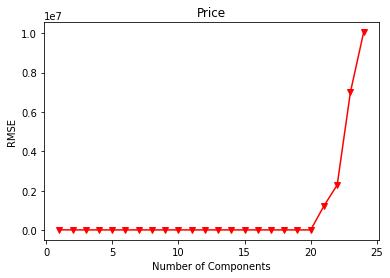

In [98]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

# Loop for calculating error
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

# Visualization of results
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Number of Components')
plt.ylabel('RMSE')
plt.title('Price');

In [99]:
pls_model = PLSRegression(n_components = 20).fit(X_train, y_train)

In [100]:
y_pred = pls_model.predict(X_test)

In [101]:
np.sqrt(mean_squared_error(y_test, y_pred))

6850.375744605577

# Ridge Regression

## Model

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df1.copy()

print("training", training.shape)

X_train (225114, 24)
y_train (225114,)
X_test (75039, 24)
y_test (75039,)
training (300153, 25)


In [103]:
from sklearn.linear_model import Ridge

In [104]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)
ridge_model

Ridge(alpha=0.1)

In [105]:
ridge_model.coef_

array([    46.58245725,   -131.28977254,  -1817.64140501,  -1664.92360776,
          -97.37826985,    497.15903333,    740.12140099,   2342.66280268,
          154.56577971,    167.14062245,   -855.5831638 ,  -1087.48807661,
         1559.51840184,     61.84643637,   -584.19614613,     61.9167957 ,
           52.59476369,    490.54412426,    169.64176025,   -190.50129139,
         1796.76635173,   4261.09539445,  -6057.86175123, -44989.55470974])

In [106]:
10**np.linspace(10,-2,100)*0.5 

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

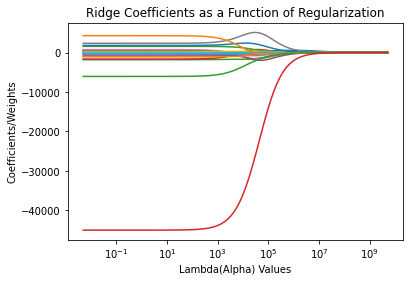

In [107]:
lambdas = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
coefficients = []

for i in lambdas:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    coefficients.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdas, coefficients) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Values')
plt.ylabel('Coefficients/Weights')
plt.title('Ridge Coefficients as a Function of Regularization');

## Prediction

In [108]:
y_pred = ridge_model.predict(X_test)

In [109]:
np.sqrt(mean_squared_error(y_test, y_pred))

6850.375735769451

## Model Tuning

In [110]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdas, 
                   scoring = "neg_mean_squared_error",
                   normalize = True)

In [111]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [112]:
ridge_cv.alpha_

0.005

In [113]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, 
                   normalize = True).fit(X_train,y_train)

In [114]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

6851.02325041194

# Lasso Regression

## Model

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df1.copy()

print("training", training.shape)

X_train (225114, 24)
y_train (225114,)
X_test (75039, 24)
y_test (75039,)
training (300153, 25)


In [116]:
from sklearn.linear_model import Lasso

In [117]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)
lasso_model

Lasso(alpha=0.1)

In [118]:
lasso_model.coef_

array([ 4.66355908e+01, -1.31288327e+02, -3.36813390e+03, -3.21715990e+03,
       -1.64838802e+03, -1.05394147e+03, -8.09021321e+02,  7.90659910e+02,
        5.41085946e+01,  6.63166884e+01, -9.55198565e+02, -1.18682335e+03,
        1.45870690e+03, -3.76826340e+01, -6.36467386e+02,  8.61727244e+00,
       -0.00000000e+00,  4.13930669e+02,  1.16530505e+02, -2.42901885e+02,
        5.12332728e+03,  7.58554274e+03, -2.73015821e+03, -4.49894871e+04])

Text(0, 0.5, 'weights')

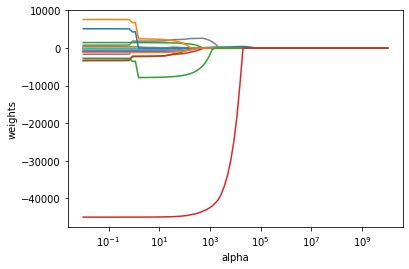

In [119]:
lasso = Lasso()
lambdas = 10**np.linspace(10,-2,100)*0.5 
coefficients = []

for i in lambdas:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    coefficients.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdas*2, coefficients)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

## Prediction

In [120]:
lasso_model.predict(X_test)

array([ 3417.22017019, 54103.23083579,  9276.2779025 , ...,
        8244.45560448, 55804.91473322, -1652.33827396])

In [121]:
y_pred = lasso_model.predict(X_test)

In [122]:
np.sqrt(mean_squared_error(y_test, y_pred))

6850.382374699668

## Model Tuning

In [123]:
from sklearn.linear_model import LassoCV

In [124]:
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000, 
                         normalize = True)

In [125]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [126]:
lasso_cv_model.alpha_

0.04485357068519255

In [127]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [128]:
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=0.04485357068519255)

In [129]:
y_pred = lasso_tuned.predict(X_test)

In [130]:
np.sqrt(mean_squared_error(y_test, y_pred))

6850.378654145184

# Elastic Net Regression

## Model

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df1.copy()

print("training", training.shape)

X_train (225114, 24)
y_train (225114,)
X_test (75039, 24)
y_test (75039,)
training (300153, 25)


In [132]:
from sklearn.linear_model import ElasticNet

In [133]:
enet_model = ElasticNet().fit(X_train, y_train)

In [134]:
enet_model.coef_

array([ 3.84249156e+02, -1.37414690e+02, -9.33598934e+02,  4.66061646e+02,
       -1.11143090e+03, -1.64938414e+03, -5.37761879e+02,  3.76811400e+03,
        1.21368330e+02,  1.01958053e+02, -3.50560426e+02, -2.18516697e+02,
        2.02421369e+02,  1.41329338e+02, -2.41730250e+02, -1.04375409e+01,
       -9.06158354e+01, -3.19797117e+01,  2.65222445e+02,  1.11542088e+02,
        1.27049706e+03, -3.66566151e+02, -9.02931901e+02, -1.29233275e+04])

In [135]:
enet_model.intercept_

26375.142719309155

## Prediction

In [136]:
enet_model

ElasticNet()

In [137]:
enet_model.predict(X_test)

array([17195.36914379, 29887.14981283, 17358.68390844, ...,
       19841.0047138 , 33177.68831973,  9474.97638   ])

In [138]:
y_pred = enet_model.predict(X_test)

In [139]:
np.sqrt(mean_squared_error(y_test, y_pred))

15816.449996999649

In [140]:
r2_score(y_test, y_pred)

0.5148344638095399

## Model Tuning

In [141]:
from sklearn.linear_model import ElasticNetCV

In [142]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)

In [143]:
enet_cv_model.alpha_

66.18700938098989

In [144]:
enet_cv_model

ElasticNetCV(cv=10, random_state=0)

In [145]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [146]:
y_pred = enet_tuned.predict(X_test)

In [147]:
np.sqrt(mean_squared_error(y_test, y_pred))

22055.104896329227

# Results


Simple Linear Regression : np.sqrt(np.mean(k_t['hata_kare']))           : 18783.46946262304


Multiple Linear Regression : 

np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()                 :  6860.827286208287


PCR : np.sqrt(mean_squared_error(y_test, y_pred))                           : 9008.824966205219


PLS : np.sqrt(mean_squared_error(y_test, y_pred))                          : 6850.375744605577


Ridge : np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))   : 6851.02325041194


Lasso: np.sqrt(mean_squared_error(y_test, y_pred))                        : 6850.378654145184


ElasticNet : np.sqrt(mean_squared_error(y_test, y_pred))                  : 22055.104896329227

<!-- Sonuçlar: 

Basit Doğrusal Regresyon : np.sqrt(np.mean(k_t['hata_kare'])) 			     : 18783.46946262304


Çoklu Doğrusal Regresyon : 

np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

                                                                             : 6860.827286208287


PCR : np.sqrt(mean_squared_error(y_test, y_pred)) 				             : 9008.824966205219


PLS : np.sqrt(mean_squared_error(y_test, y_pred)) 			             	 : 6850.375744605577


Ridge : np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test))) 	 : 6851.02325041194


Lasso: np.sqrt(mean_squared_error(y_test, y_pred)) 				             : 6850.378654145184


ElasticNet : np.sqrt(mean_squared_error(y_test, y_pred)) 			         : 22055.104896329227 -->